# Problem Statement: Download IRIS dataset from UCI Repository
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 
Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.

A.Perform data-preparation ( Train-Test Split)

B.Apply Logistic Regression Algorithm 

C.Evaluate Model.


## Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
A=pd.read_csv("C:\\Users\\desktop\\Downloads\\archive\\IRIS.csv")

In [3]:
A.shape

(150, 5)

In [ ]:
A


In [ ]:
A.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
A.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
A.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
A["species"]=A["species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [ ]:
A.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
A.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## split the dataset

In [ ]:
X=A[['sepal_length','sepal_width','petal_length','petal_width']]
Y=A[['species']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print('xtrain:',Xtrain.shape)
print('xtest:',Xtest.shape)
print('ytrain:',Ytrain.shape)
print('ytest:',Ytest.shape)

xtrain: (105, 4)
xtest: (45, 4)
ytrain: (105, 1)
ytest: (45, 1)


## create Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg=LogisticRegression()

In [ ]:
model=reg.fit(Xtrain,Ytrain)

In [ ]:
ypred=model.predict(Xtest)

In [ ]:
print(ypred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


## Preprocessing Dataset

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
A['species']=label_encoder.fit_transform(A['species'])
A['species'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
la.fit_transform(A['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Checking Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,ypred)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(Ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Ytest,ypred)
print(acc)

1.0


## Visualizing confusion matrix

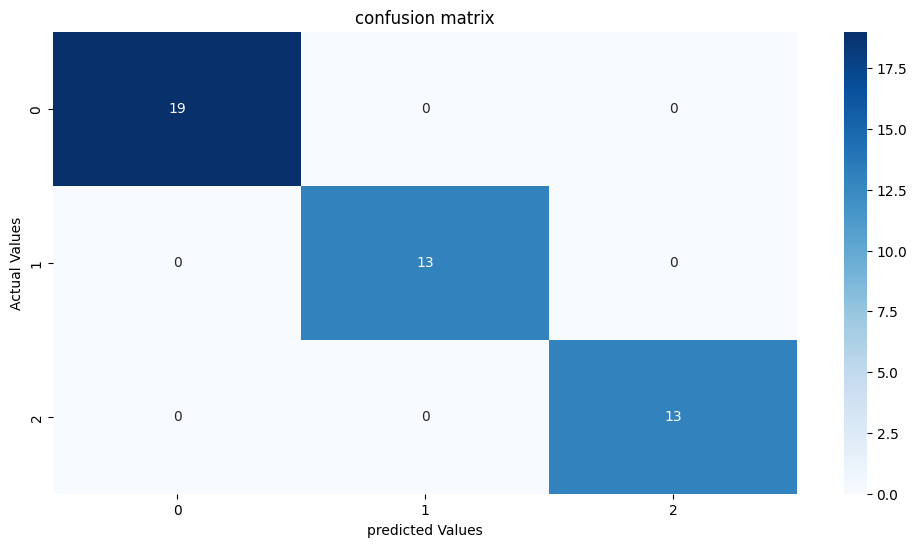

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Ytest,ypred)
plt.figure(figsize=(12,6))
plt.title("confusion matrix")
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("predicted Values")
plt.savefig('confusion_matrix.png')